In [ ]:
import os
import json
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from datascience import *

In [36]:
tp = 'demo/example.json'
with open(tp, 'r') as f:
    data = json.load(f)

def post_process_timestamps(data):

    time_remaining = []
    for k, v in data.items():
        tr = v['time_remaining']
        time_remaining.append(tr) if tr != None else time_remaining.append(0)

    fps = 30
    multiplier = 0
    decreasing = False
    last_index = len(time_remaining)
    for i in range(last_index):
        curr = time_remaining[i]
        peak_value = time_remaining[i]
        if curr == 0:
            continue
        if decreasing:
            if multiplier == 30:
                multiplier = 0
                decreasing = False
            else:
                time_remaining[i] -= round(((1/30) * multiplier), 2)
                multiplier += 1
                continue
        if i < (last_index - fps):
            peak_value = time_remaining[i + fps]
        if peak_value < curr:
            decreasing = True
        else:
            decreasing = False
        if not decreasing:
            time_remaining[i] = 0
    
    for k, v in data.items():
        data[k]['time_remaining'] = time_remaining[int(k)] if time_remaining[int(k)] != 0 else None
    return time_remaining

tr = post_process_timestamps(data)

In [50]:
x=[j for i,j in enumerate(tr) if j!=0] 
t = Table().with_columns(
    'index', np.arange(0, len(x)),
    'tr', np.gradient(x)
    )

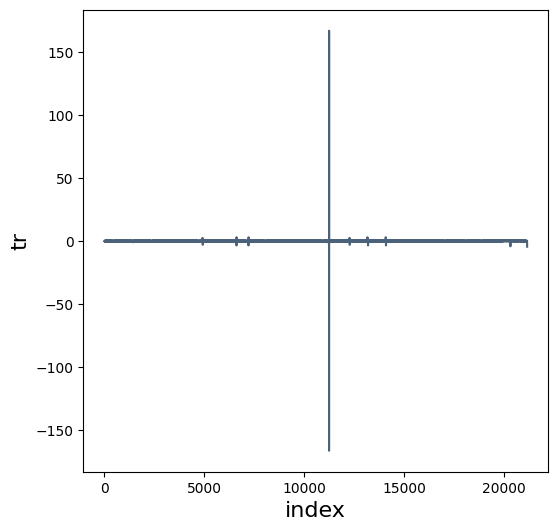

In [51]:
t.plot('index')

In [3]:
fp = 'processed_vids.txt'
dir_p = '/Users/leviharris/Library/CloudStorage/GoogleDrive-leviharris555@gmail.com/Other computers/mac_new/NBA_HUDL_data/nba-plus-statvu-dataset/timestamp-visualizations'
with open(fp, 'w') as f:
    vids = os.listdir(dir_p)
    for v in vids:
        f.write(v)
        f.write('\n')

In [1]:
import os

fp = '/Users/leviharris/Library/CloudStorage/GoogleDrive-leviharris555@gmail.com/Other computers/mac_new/NBA_HUDL_data/nba-plus-statvu-dataset/timestamps'
len(os.listdir(fp))

63